# Solar Power Output Prediction

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression

In [2]:
! pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [3]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge

## Loading dataset

In [4]:

# Load the data
df = pd.read_csv('Dataset.csv')
df.head()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.10095
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.99940
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.84930
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.60920
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.20340


## Data Preprocessing

### Splitting Dataset into features and target

In [5]:

# splitting the data into features and target
X = df.drop('generated_power_kw', axis=1)
y = df['generated_power_kw']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scaling the features

In [7]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Selection

### Diverse Model Evaluation

In [8]:

# List of models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'XGBoost': XGBRegressor()
}

In [9]:
# Function to evaluate models
def evaluate_models(models, X_train, y_train, X_test, y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        # Calculate metrics
        mae = mean_absolute_error(y_test, predictions)
        rmse = root_mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        # Store performance
        results[name] = {
            'MAE': mae,
            'RMSE': rmse,
            'R²': r2
        }
    return results

In [10]:

# Evaluate all models
performance_results = evaluate_models(models, X_train_scaled, y_train, X_test_scaled, y_test)

### Comparision

In [11]:

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(performance_results).T
print(results_df)

                                 MAE        RMSE        R²
Linear Regression         391.792696  507.532322  0.718008
Decision Tree             333.780656  563.529956  0.652350
Random Forest             256.375487  408.214174  0.817575
Gradient Boosting         288.240644  426.938662  0.800456
Support Vector Regressor  765.641435  867.807856  0.175566
K-Nearest Neighbors       334.157674  491.251700  0.735810
XGBoost                   261.371237  417.945998  0.808773


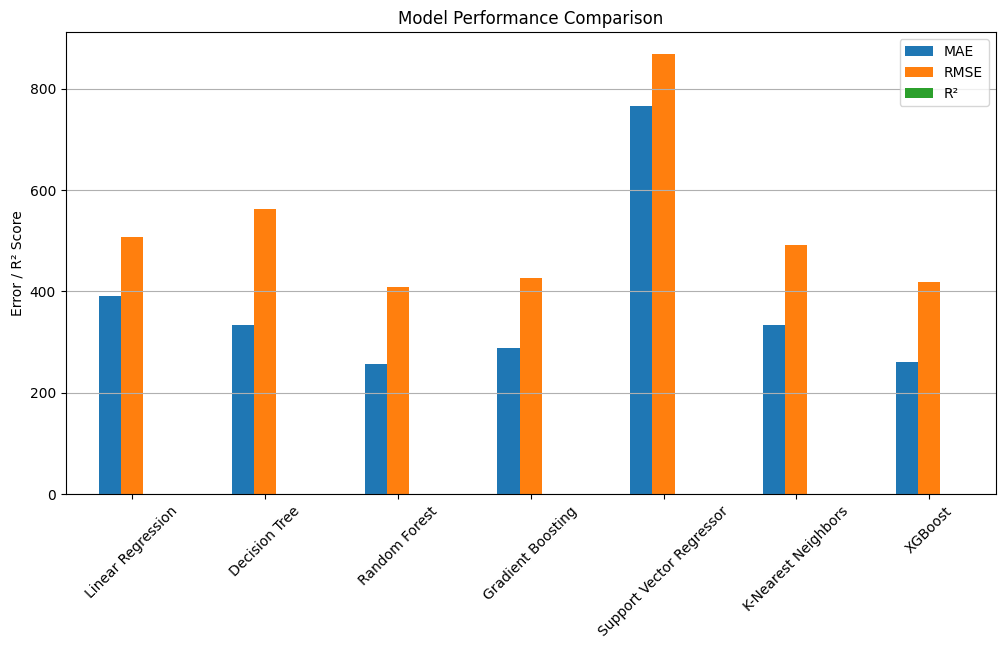

In [12]:
# Visualize performance
results_df.plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Error / R² Score')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

##### Random Forest Regressor gives better performance, so lets take that

### Hyperparameter Optimization

#### Training and Evaluation

In [13]:

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

####  Predict on the test dataset

In [14]:
rf_predictions = rf_model.predict(X_test_scaled)

In [15]:

# Calculate evaluation metrics
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = root_mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
rf_mape = mean_absolute_percentage_error(y_test, rf_predictions)

print(f'Random Forest -\n MAE: {rf_mae}\n RMSE: {rf_rmse}\n R²: {rf_r2}\n MAPE: {rf_mape}')

Random Forest -
 MAE: 255.54273257404114
 RMSE: 407.6146721003551
 R²: 0.8181102229401732
 MAPE: 152.3751094092072


### Actual vs Predicted values

In [16]:
def get_predictions_and_differences(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred, "Difference": y_test - y_pred})
    return results

rf_results = get_predictions_and_differences(rf_model, X_train_scaled, y_train, X_test_scaled, y_test)
print("Random forest regressor Predictions:")
print(rf_results)

Random forest regressor Predictions:
          Actual    Predicted  Difference
643   2511.23750  2273.408245  237.829255
166    480.20512   410.540203   69.664917
1444  2017.56870  1767.112829  250.455871
1877   760.14012   375.907463  384.232657
463    220.39500    70.091951  150.303049
...          ...          ...         ...
3471   646.08583   868.554477 -222.468647
654   2574.23550  2417.014371  157.221129
2578  2171.79970  2018.639286  153.160414
1551  2720.91670  2703.518256   17.398444
879   2119.10840  2106.737060   12.371340

[843 rows x 3 columns]


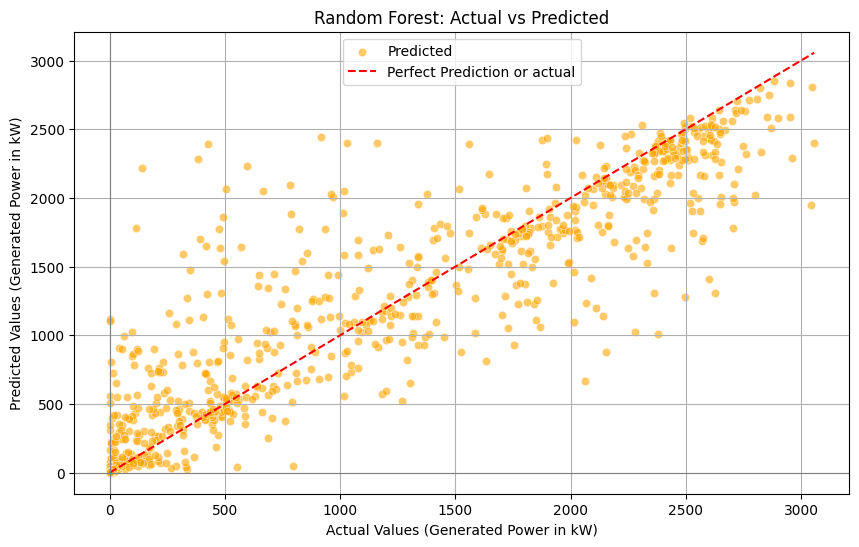

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot predicted values
sns.scatterplot(x=y_test, y=rf_predictions, color='orange', label='Predicted', alpha=0.6)

# Add a line indicating perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction or actual')

# Add title and labels
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual Values (Generated Power in kW)')
plt.ylabel('Predicted Values (Generated Power in kW)')
plt.axhline(0, color='grey', lw=0.8)  # Optional: Horizontal line at y=0
plt.axvline(0, color='grey', lw=0.8)  # Optional: Vertical line at x=0
plt.grid()

# Display the legend
plt.legend()

# Show the plot
plt.show()


#### Residual Analysis

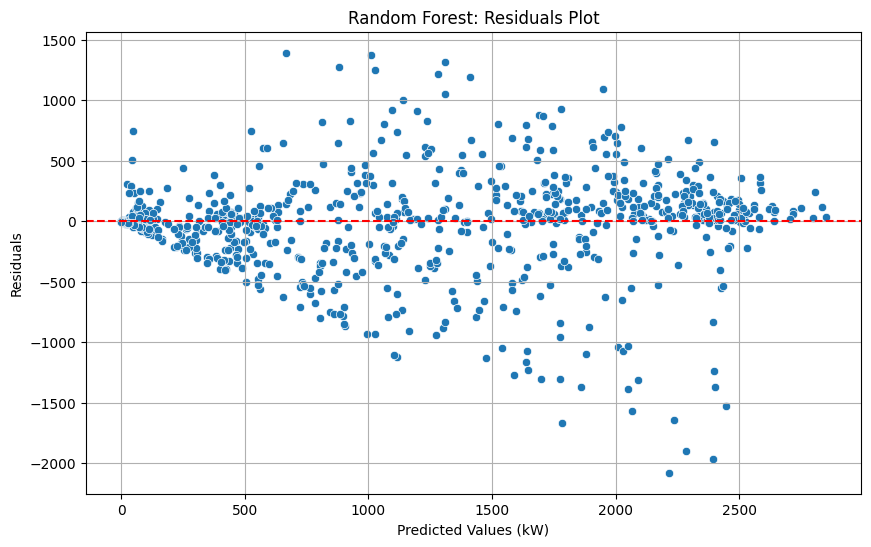

In [18]:
# Compute residuals
rf_residuals = y_test - rf_predictions

# Residual Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=rf_predictions, y=rf_residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Random Forest: Residuals Plot')
plt.xlabel('Predicted Values (kW)')
plt.ylabel('Residuals')
plt.grid()
plt.show()

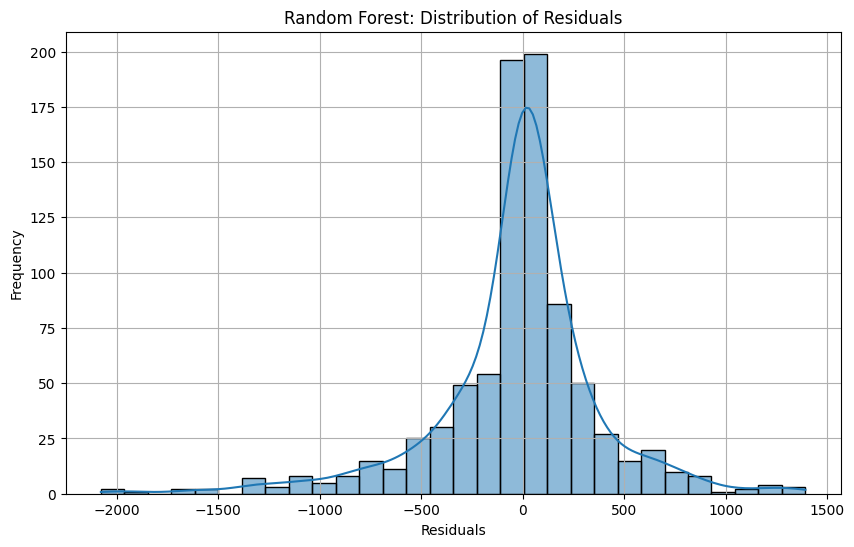

In [19]:

# Distribution of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(rf_residuals, bins=30, kde=True)
plt.title('Random Forest: Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid()
plt.show()

#### Feature Importance

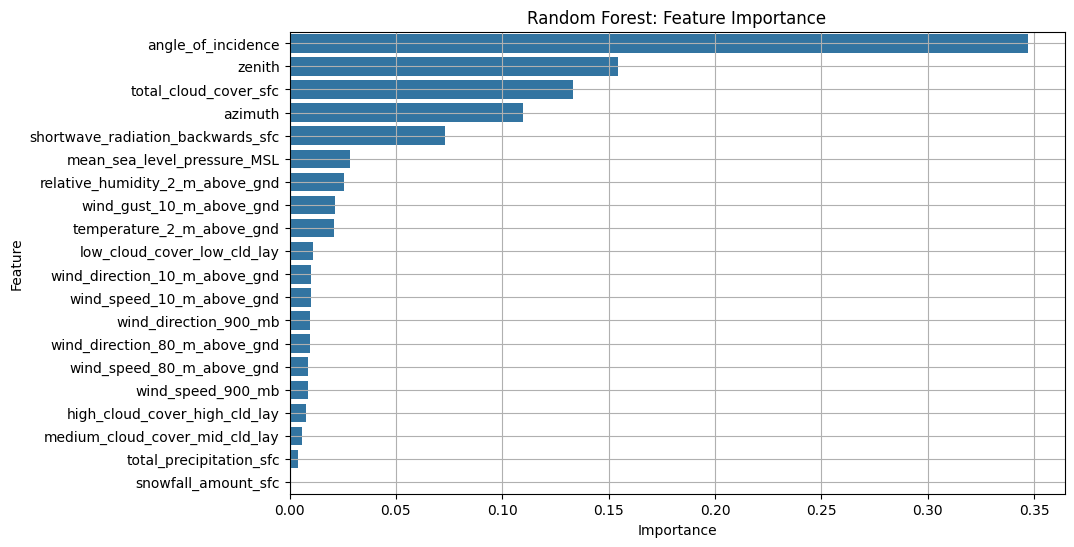

In [20]:
# Feature Importance Plot
importances = rf_model.feature_importances_
feature_names = X.columns  # Assuming 'X' contains the names of your features

# Create a DataFrame to visualize
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Random Forest: Feature Importance')
plt.grid()
plt.show()

#### Randomized Search for best hyperparemeters

In [ ]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],         # Number of trees in the forest
    'max_features': ['auto', 'sqrt'],       # Number of features to consider at every split
    'max_depth': [None, 10, 20, 30],        # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],        # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],          # Minimum samples required at each leaf node
    'bootstrap': [True, False]              # Whether bootstrap samples are used when building trees
}



: 

In [ ]:
# Randomized search cross-validation
random_search = RandomizedSearchCV(estimator=rf_model,
                                   param_distributions=param_grid,
                                   n_iter=10,          # Number of random combinations to try
                                   cv=3,               # Number of cross-validation folds
                                   n_jobs=-1,          # Use all available cores
                                   verbose=2,          # Control the verbosity of the output
                                   random_state=42)    # For reproducibility

# Fit the model
random_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


## Final Evaluation

In [ ]:

# Train the best model with the best parameters
best_rf_model = random_search.best_estimator_  # or random_search.best_estimator_

# Make predictions on test set
y_pred = best_rf_model.predict(X_test)

# Evaluate performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}, RMSE: {rmse}, R²: {r2}')